# NE 630 - Lesson 18

In this tutorial, explore how to use OpenMC through the `LWRUnitCell` and `SFRUnitCell` classes in `unitcell_utils.py` to compute region-wise fluxes and cross sections.

## Revisiting the SFR

Generally, the neutron flux depends on energy *and* space, i.e., 

$$
  \phi = \phi(\mathbf{r}, E) \, .
$$

Thus, total reaction rates (per s) require integration over both space and energy, e.g.,

$$
  k_{\infty} = \frac{\iiint\limits_{V} \int\limits^{\infty}_0 \nu(E) \Sigma_f(E) \phi(\mathbf{r}, E) d^3 r}
                    { \iiint\limits_{V} \int\limits^{\infty}_0 \Sigma_a(E) \phi(\mathbf{r}, E) d^3 r } \, .
 \tag{***}                    
$$


Now, recall Eq. (4.8) from the text:

$$
k_{\infty} = \frac{ V_f \nu\bar{\Sigma}_f^f }
                  { V_f \bar{\Sigma}_a^f + V_c \bar{\Sigma}_a^{c} + V_{st} \bar{\Sigma}_a^{st}} \, .
\tag{4.8}                  
$$

This expression for $k_{\infty}$ assumes that $\phi(\mathbf{r}, E) = \phi(E)$, i.e., the neutron flux is spatially constant.  **You should be able to derive Eq. (4.8) from the *** expression for $k_{\infty}$.**

We can again demonstrate this spatial independence.

Let's create an SFR unit cell using the `unitcell_utils.py` module uploaded to Canvas.  Get this file into your home directory on Beocat by
 
  1. Downloading from Canvas and uploading 
  2. Executing `cp /homes/jaroberts/data/unitcell_utils.py .` in the terminal.

Do one of these now.

In [ ]:
#openmc.config["cross_sections"] = "/homes/jaroberts/data/cross_sections.xml"

In [1]:
import sys
sys.path.append("unitcell")
from unitcell_utils import *

In [3]:
help(SFRUnitCell.__init__)

Help on function __init__ in module unitcell_utils:

__init__(self, fuel_radius, clad_radius, pitch, T_cool=800, T_fuel=1200, group_bounds=array([1.e+00, 1.e+07]), enrichment=10, pu_fraction=0.1)
    _summary_
    
    Args:
        fuel_radius (float, optional): _description_. Defaults to 0.40.
        clad_radius (float, optional): _description_. Defaults to 0.45.
        pitch (float, optional): _description_. Defaults to 1.1.
        T_cool (int, optional): Coolant (sodium) temperature [K]. Defaults to 600.
        T_fuel (int, optional): Fuel temperature [K]. Defaults to 1200.
        group_bounds (np.array, optional): Group bounds for cross sections [eV]. Defaults to np.array([1.0, 1e5, 1e7]).
        enrichment (float, optional): Uranium enrichment [%]. Defaults to 15.
        pu_fraction (float, optional): Fraction of heavy metal that is Pu-239. Defaults to 0.1.



Now, use the dimensions from Lesson 16 to define our SFR unit cell:

  - $r_f = 0.3322$ cm
  - $r_c = 0.3928$ cm
  - $P = 2h = 2(0.4935)$ cm (the *pitch*)

Use the defaults for other parameters.

In [4]:
sfr = SFRUnitCell(0.3322, 0.3928, 2*.4935)

/home/robertsj/Research/openmc/openmc/material.py:745: UserWarning: A uranium enrichment of 10 was given for Material ID="1". OpenMC assumes the U234/U235 mass ratio is constant at 0.008, which is only valid at low enrichments. Consider setting the isotopic composition manually for enrichments over 5%.
  warnings.warn(msg)


Use the `plot` function to inspect the geometry.

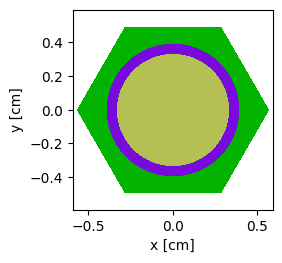

In [5]:
sfr.plot()

Now, let's run the simulation.

In [6]:
help(sfr.run)

Help on method run in module unitcell_utils:

run(ng=10, np=10000) method of unitcell_utils.SFRUnitCell instance
    Run the simulation needed to generate the fluxes and cross sections.
    
    The number of generations is the *total* number simulated, but 5 are always "inactive.
    
    Args:
        ng (int, optional): Number of fission generations. Defaults to 10.
        np (int, optional): Number of particles per generation. Defaults to 10000.



In [7]:
sfr.run() 

/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=4.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=3.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=5.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=15.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=16.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=7.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Now, plot the region-wise spectra:

In [8]:
help(sfr.plot_spectrum)

Help on method plot_spectrum in module unitcell_utils:

plot_spectrum(per_unit_lethargy=False) method of unitcell_utils.SFRUnitCell instance



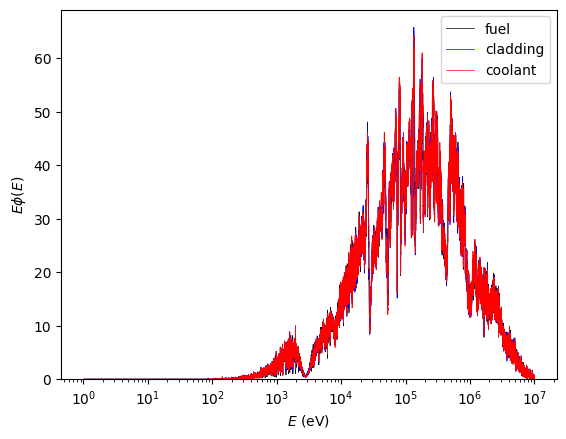

In [12]:
sfr.plot_spectrum(True)

## A PWR unit cell and the Four-Factor Formula

In LWRs, we can no longer factor out an energy-dependent flux spectrum, and, from Eq. (4.18), we have

$$
  k_{\infty} = \frac{V_f \int^{\infty}_0 \nu\Sigma^f_f(E) \phi_f(E) dE}
   {V_f \int^{\infty}_0 \Sigma_a^f \phi_f(E) dE 
     + V_m \int^{\infty}_0 \Sigma_a^m(E) \phi_m(E) dE} \, .
  \tag{4.18} 
$$

Note that this expression *does* assume that $\phi(\mathbf{r}, E)$ is spatially uniform within a region, e.g.,

$$
  \phi_f(\mathbf{r}, E) = \phi_f(E), \qquad \mathbf{r} \in V_f \, .
$$

If there *is* spatial variation, then we still use Eq. (4.18) if we use a volume averaged flux, e.g.,

$$
  \phi_f(E) = \phi_f(\mathbf{r}, E) = \frac{\iiint\limits_{V_f} \phi_f(\mathbf{r}, E) d^3 r}{V_f} \, .
$$

Now, let's create a PWR unit cell using the `LWRUnitCell` class, which has nearly identical inputs.  Here, take the fuel radius to be 0.41 cm, the outer cladding radius to be 0.48 cm, and the pitch to be 1.26 cm, leaving all other arguments as their defaults.  Then plot the cell.

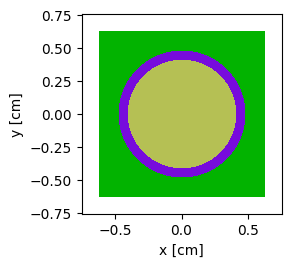

In [14]:
pwr = LWRUnitCell(0.41, 0.48, 1.26)
pwr.plot()

Now, run the cell.

In [15]:
pwr.run()

/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Tally instance already exists with id=1.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=34.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=33.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=35.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=45.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=46.
  warn(msg, IDWarning)
/home/robertsj/Research/openmc/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=37.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

By default, two-group parameters (fluxes and cross sections) are produced for energy groups $10^{-3}$-1 eV and 1-$10^{7}$ eV.  Internally, values in each of the fuel, cladding, and coolant regions are produced, but values for a fourth "non-fuel" region are computed: **these will be used in place of the moderator values in Eq. (4.18)!**, i.e.,

$$
  k_{\infty} = \frac{V_f \int^{\infty}_0 \nu\Sigma^f_f(E) \phi_f(E) dE}
   {V_f \int^{\infty}_0 \Sigma_a^f \phi_f(E) dE 
     + V_{nf} \int^{\infty}_0 \Sigma_a^{nf}(E) \phi_{nf}(E) dE} \, .
  \tag{4.18*} 
$$

For example, the fuel region's fluxes, absorption cross section, and volume are 

In [17]:
print(pwr.flux['fuel'])
print(pwr.SigmaA['fuel'])
print(pwr.volume['fuel'])
pwr.flux['fuel'][0]/pwr.flux['fuel'][1]

[26.17763866  3.70332474]
[0.03014192 0.27926757]
0.5281017250684441


7.068685702204183

**Sanity Check Time**: 

  - Which flux is the the thermal flux and why?
  - How do you print just that value?
  - Verify the fuel volume.
  
The book uses the notation $\bar{\phi}_{fT}$ (Eq. (4.44) for the (total) fuel thermal flux.  I prefer the simpler notation $\phi^f_{T}$ or, where unambiguous, $\phi^f_2$, where group "2" is the thermal group.  In our previous two-group and multigroup content, a group flux $\phi_g$ is *always* the integral of $\phi(E)$ over the group energies.

**Double click on me and put your answers here**

In the book, the various four factors are defined in terms of fast (F), intermediate (I), and thermal (T) reaction rates in the fuel (f) and moderator (m) regions.  Here, we're changing (m) to (nf) as noted above and lumping (I) and (F) together as one larger fast group (F).  

In the equations for $\eta_T$, $f$, $p$, and $\epsilon$ below, I want you to modify the expressions to account for these changes.  

**Reproduction Factor** 

$$
  \eta_T = \frac{\nu\bar{\Sigma}_{fT}^f} {\bar{\Sigma}^f_{aT}}
  \tag{4.49}
$$

**Thermal Utilization**

$$
 f = \frac{1}{1 + \zeta \left(V_{nf} \bar{\Sigma}^{nf}_{aT} / V_f \bar{\Sigma}^f_{aT} \right ) } \, ,
 \tag{4.48}
$$

where

$$
  \zeta = \frac{\bar{\phi}_{nfT}}{\bar{\phi}_{fT}} \, ,
  \tag{4.50}
$$

is the *thermal disadvantage factor*.

**Resonance Escape Probability**

$$
 p = 1 - \frac{V_f \int_I \Sigma_a^f(E) \phi_f(E) dE} 
              {V_f \left [ \int_T \Sigma_a^f(E) \phi_f(E) dE + \int_I \Sigma_a^f(E) \phi_f(E) dE \right ] 
               + V_m \int_T \Sigma_a^m(E) \phi_m(E) dE } \, .
 \tag{4.28}               
$$

**Fast Fission Factor**

$$
 \varepsilon = \frac{\int_T \nu\Sigma_f^f(E) \phi_f(E) dE + \int_F \nu\Sigma_f^f(E) \phi_f(E) dE}
 {\int_T \nu\Sigma_f^f(E) \phi_f(E) dE} \, .
 \tag{4.25}
$$

In the expressions for $p$ and $\varepsilon$, integrals over energies are taken.  With use of effective cross sections, one can write, e.g.,

$$
    V_f \int_T \Sigma^f_a(E) \phi_f(E) dE = V_f \bar{\Sigma}_{aT} \phi_{fT} .
$$

Either in new cells or your (paper) notes, simplify your modified Eqs. (4.25) and (4.28) in terms of the effective cross sections and group-wise fluxes.

With those definitions, compute the four factors for our unit cell:

In [23]:
## eta_T here
V_f = pwr.volume['fuel']
nuΣF_T = pwr.nuSigmaF['fuel'][1]
ΣA_T = pwr.SigmaA['fuel'][1]

eta_t = nuΣF_T / ΣA_T
eta_t

V_nf = pwr.volume['non-fuel']
V_nf

1.0594982749315558

In [ ]:
## f here

In [ ]:
## p here

In [ ]:
## epsilon here

Finally, use these four factors to compute the multiplication factor, i.e.,

$$
  k_{\infty} = \varepsilon p f \eta_T  \, .
  \tag{4.24}
$$

In [ ]:
## kinf here

## Wrapping Up

When you are completed with the tasks above, print the notebook (to PDF), and upload to to Homework 6 on Canvas. 

(If printing to PDF fails, upload the notebook file directly.)